<a href="https://colab.research.google.com/github/AbhishekMane06/Models/blob/main/fifa_players_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

2. Loading the Dataset

In [ ]:

df = pd.read_csv("/content/fifa_players_cleaned.csv")


In [ ]:
df.columns

Index(['corrected_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential',
       'preferred_foot', 'international_reputation(1-5)', 'weak_foot(1-5)',
       'skill_moves(1-5)', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle'],
      dtype='object')

3. Checking the players preferred foot (Left or Right):

In [ ]:
preferred_foot_distribution = df["preferred_foot"].value_counts()
print("\nPreferred foot distribution of players:")
print(preferred_foot_distribution)


Preferred foot distribution of players:
preferred_foot
Right    13748
Left      4159
Name: count, dtype: int64


4.  Selecting Features and Target variable

In [ ]:

features = ["crossing", "finishing", "short_passing", "dribbling",
            "freekick_accuracy", "ball_control", "standing_tackle", "sliding_tackle",
            "stamina", "strength", "sprint_speed", "aggression", "vision",
            "interceptions", "positioning", "penalties", "reactions", "composure"]


target = "overall_rating"




5. Drop rows with missing values in features or target variable

In [ ]:
df = df.dropna(subset=["corrected_name"] + features + [target])

6. Define Features (X) and Target (y)

In [ ]:
X = df[["corrected_name"] + features]  # Keeping corrected_name to track predictions
y = df[target]

7. Splitting dataset into Training and Testing sets (80% train, 20% test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

8. Store player names separately for tracking

In [ ]:

player_names_test = X_test["corrected_name"]

# Drop player names from feature set
X_train = X_train.drop(columns=["corrected_name"])
X_test = X_test.drop(columns=["corrected_name"])

9. Train the Model (Random Forest Regressor)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Making Predictions
y_pred = model.predict(X_test)

10. Displaying the Model Performance


In [ ]:

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")




Model Performance:
Mean Absolute Error (MAE): 1.33
R² Score: 0.92


11. Create a DataFrame to compare actual vs predicted player ratings

In [ ]:
predictions_df = pd.DataFrame({
    "Player Name": player_names_test.values,
    "Actual Rating": y_test.values,
    "Predicted Rating": y_pred
})

12. Display the Top 20 Players based on Predicted Rating

In [ ]:
top_20 = predictions_df.sort_values(by="Predicted Rating", ascending=False).head(20)
print("\nTop 20 Player Predictions:")
print(top_20)


Top 20 Player Predictions:
                         Player Name  Actual Rating  Predicted Rating
2057  Lionel Andrés Messi Cuccittini             94             91.43
1064                     Eden Hazard             91             91.11
3028       David Josué Jiménez Silva             90             90.51
1128                      Harry Kane             90             89.63
2886                    Mats Hummels             88             87.04
1926                 Mario Mandžukić             85             86.52
2319                       Jan Oblak             90             86.42
1963                 Vincent Kompany             85             85.55
2125                    Sami Khedira             84             85.48
2599           Gerard Piqué Bernabéu             88             85.42
2933                 Aymeric Laporte             85             85.25
1385                 Lucas Hernández             83             84.57
1211               Gareth Frank Bale             88           

13. Scatter Plot to visualize Actual vs. Predicted Ratings

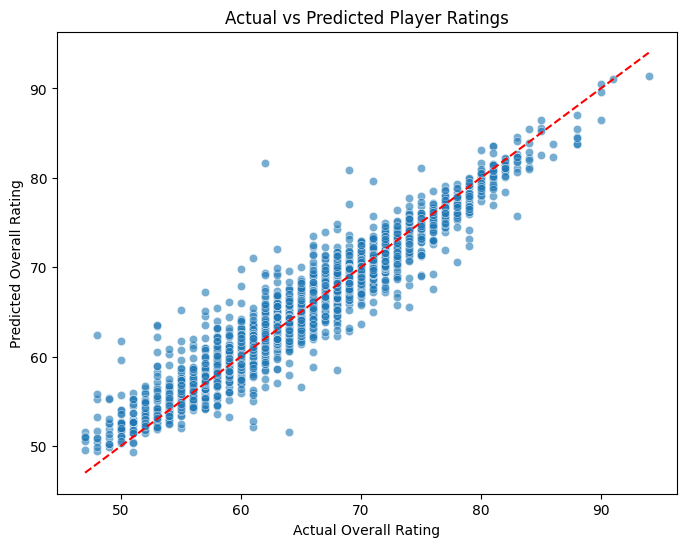

In [ ]:
# Scatter Plot: Actual vs. Predicted Ratings
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle="--")
plt.xlabel("Actual Overall Rating")
plt.ylabel("Predicted Overall Rating")
plt.title("Actual vs Predicted Player Ratings")
plt.show()